In [3]:

import numpy as np

# fake_data_file.npy
file_path = '/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_map07-17_interval1_seq500_nfea10_pad-300/ddpm_fake_inD_map07-17_interval1_seq500_nfea10_pad-300.npy'

# 使用numpy的load函数读取npy文件
fake_data_norm = np.load(file_path)

# 现在，变量data包含了npy文件中的数据
# 你可以打印数据来查看内容，或者进行其他操作
print(fake_data_norm[0])

[[9.00937408e-01 9.43635374e-01 8.49395990e-04 ... 0.00000000e+00
  6.00814819e-05 1.53750181e-04]
 [9.01416212e-01 9.45403934e-01 3.07083130e-04 ... 3.84449959e-05
  1.87814236e-04 2.65657902e-04]
 [9.01892692e-01 9.44482893e-01 3.24428082e-04 ... 3.46899033e-05
  1.53660774e-04 2.65955925e-04]
 ...
 [9.25017118e-01 9.11615372e-01 0.00000000e+00 ... 5.01990318e-04
  0.00000000e+00 3.73005867e-04]
 [9.24911916e-01 9.11490947e-01 0.00000000e+00 ... 4.64290380e-04
  0.00000000e+00 4.15682793e-04]
 [9.24795717e-01 9.11209434e-01 3.14116478e-04 ... 4.32610512e-04
  1.31368637e-04 8.50975513e-04]]


In [4]:
print(fake_data_norm.shape)
print(fake_data_norm[0].shape)

(49500, 500, 10)
(500, 10)


In [32]:
#MinMaxScaler renormalization (with extrem value as padding value)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer
df = pd.read_csv("/DATA1/rzhou/ika/multi_testcases/rounD/ori/seq500/00-01/rounD_map01_interval1_seq500_nfea10.csv", header=0)
data = df.values

# 定义一个极端的填充值
extreme_value = -300
# 替换所有为0的值
data[data == 0] = extreme_value

scaler = MinMaxScaler()
scaler = scaler.fit(data[:,1:])
seq_length=500
num_feature=10
fake_data=scaler.inverse_transform(fake_data_norm.reshape(-1, num_feature)).reshape(-1, seq_length, num_feature)

# 将所有绝对值小于10的元素替换为0
#fake_data[np.abs(fake_data) < 5] = 0
fake_data[fake_data < -200] = 0

# 验证替换结果
fake_data[:1]  # 展示处理后的第一个样本以减少输出量

array([[[121.3575683 , -56.81700195, 100.99398534, ...,   0.        ,
           0.        ,   0.        ],
        [121.15974838, -56.94592651, 101.32454406, ...,   0.        ,
           0.        ,   0.        ],
        [121.07117398, -56.9957832 , 101.65105632, ...,   0.        ,
           0.        ,   0.        ],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]])

In [19]:
#MinMaxScaler renormalization (0 as padding value)
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,QuantileTransformer
df = pd.read_csv("/DATA1/rzhou/ika/multi_testcases/rounD/ori/seq500/09-23/int10/rounD_map09-23_interval10_seq500_nfea10_padreal.csv", header=0)
data = df.values

scaler = MinMaxScaler()
scaler = scaler.fit(data[:,1:])
seq_length=500
num_feature=10
fake_data=scaler.inverse_transform(fake_data_norm.reshape(-1, num_feature)).reshape(-1, seq_length, num_feature)

# 将所有绝对值小于10的元素替换为0
#fake_data[np.abs(fake_data) < 5] = 0

# 验证替换结果
fake_data[:1]  # 展示处理后的第一个样本以减少输出量

array([[[ 1.15746100e+02, -2.44727760e+01,  1.13656313e+02, ...,
         -2.14068877e+01,  1.34377715e+02, -2.16905514e+01],
        [ 1.15788629e+02, -2.54351369e+01,  0.00000000e+00, ...,
         -1.00425827e+02,  0.00000000e+00, -1.00573295e+02],
        [ 1.15599124e+02, -2.57062492e+01,  1.02016396e-01, ...,
         -1.00487851e+02,  6.48863197e-02, -1.00604594e+02],
        ...,
        [ 1.20539611e+02, -7.20386544e+00,  1.13661410e+02, ...,
         -2.14745249e+01,  1.34092356e+02, -2.14318331e+01],
        [ 1.20481698e+02, -7.15273256e+00,  1.13700264e+02, ...,
         -2.15201011e+01,  1.33985212e+02, -2.14428551e+01],
        [ 1.20547890e+02, -7.35140554e+00,  1.13763657e+02, ...,
         -2.15953639e+01,  1.33874263e+02, -2.14285668e+01]]])

In [38]:
data=pd.DataFrame(fake_data[0])
data_shape=data.shape
print(data_shape)

(500, 10)


In [21]:
#optional,有需求的话可以打出来看一眼
df_single = pd.DataFrame(fake_data[0])
df_single.to_csv("check_faka_data.csv", index=False)

In [21]:
#输出到tracks.csv文件
import pandas as pd
import numpy as np

data=pd.DataFrame(fake_data[0])
data_shape=data.shape
# 设置固定值
recordingId = 24
heading = 50
fixed_values = {
    'width': 0, 'length': 0, 'xVelocity': 0, 'yVelocity': 0,
    'xAcceleration': 0, 'yAcceleration': 0, 'lonVelocity': 0,
    'latVelocity': 0, 'lonAcceleration': 0, 'latAcceleration': 0
}

# 准备用于DataFrame创建的数据列表
rows_list = []

for trackId in range(data.shape[1] // 2):  # 每两列代表一个track
    for frame in range(data.shape[0]):
        xCenter = data.iloc[frame, trackId * 2]
        yCenter = data.iloc[frame, trackId * 2 + 1]
        row = {
            'recordingId': recordingId,
            'trackId': trackId,
            'frame': frame,
            'trackLifetime': frame,
            'xCenter': xCenter,
            'yCenter': yCenter,
            'heading': heading,
            **fixed_values  # 将fixed_values字典解包添加进来
        }
        rows_list.append(row)

# 一次性创建DataFrame
df = pd.DataFrame(rows_list)

df.to_csv(path_or_buf='fake01_tracks.csv', index=False)


In [8]:
num_tracks = fake_data.shape[2] // 2
num_tracks

250

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


random_index=36


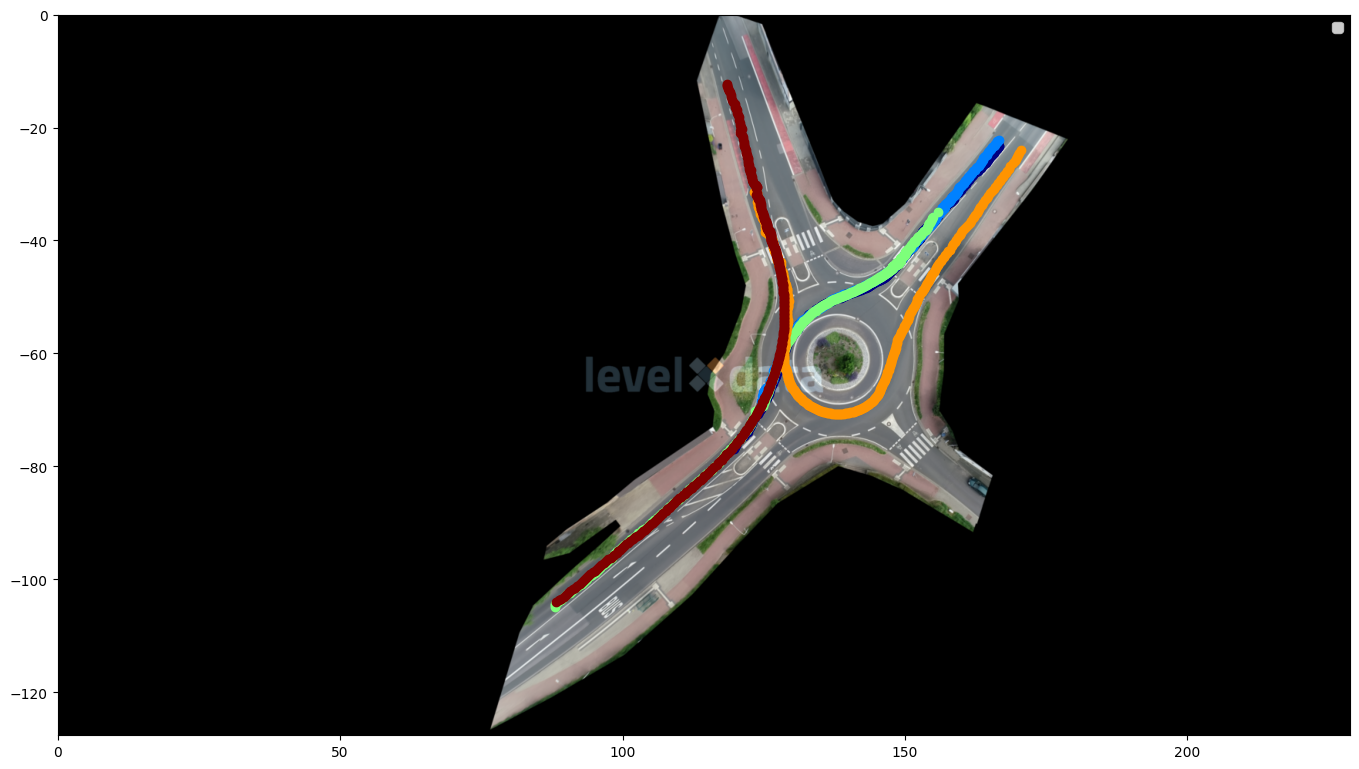

In [36]:
#画轨迹的静态图 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

# 载入背景图片
Dtype="rounD" 
index_map=1

bg_image_path =f'/DATA1/rzhou/ika/{Dtype}/data/{index_map:02d}_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size

# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)


# 创建图形和轴，使用图像的原始尺寸
fig, ax = plt.subplots(figsize=figsize)

df_recordingMeta = pd.read_csv(f"/DATA1/rzhou/ika/{Dtype}/data/{index_map:02d}_recordingMeta.csv")
# 读取最后一列"orthoPxToMeter"的值
ortho_px_to_meter = df_recordingMeta["orthoPxToMeter"].iloc[0]

# 设置坐标轴的范围
ax.set_xlim(0, width*ortho_px_to_meter*10)
ax.set_ylim(-height*ortho_px_to_meter*10, 0)
# 加载并显示背景图
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, width*ortho_px_to_meter*10, -height*ortho_px_to_meter*10, 0])

num_tracks = fake_data.shape[2] // 2

colors = plt.cm.jet(np.linspace(0, 1, num_tracks))  # 生成颜色
random_index= random.randint(0, fake_data.shape[0]-1)
print(f"random_index={random_index}")
for i in range(num_tracks):
    # 提取每个轨迹的x和y坐标
    x = fake_data[random_index][:, i * 2]  # 偶数列为x坐标
    y = fake_data[random_index][:, i * 2 + 1]  # 奇数列为y坐标
    
    # 过滤出非零点
    nonzero_indices = (x != 0) & (y != 0)
    x_filtered = x[nonzero_indices]
    y_filtered = y[nonzero_indices]

    # 绘制轨迹
    ax.plot(x_filtered, y_filtered, marker='o', linestyle='-', color=colors[i])  # 移除了label参数，以避免图例过于拥挤
    #ax.plot(x, y, marker='o', linestyle='-', color=colors[i])  # 移除了label参数，以避免图例过于拥挤

# 添加图例
ax.legend()

plt.show()


In [ ]:
#动画 5个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random

# 假设 fake_data 是一个形状为 (2001, 100, 10) 的数组
# 这里你需要加载你的真实数据
# fake_data = ...

# 随机选择一个元素而不是固定的 330
random_index = random.randint(0, fake_data.shape[0] - 1)
#random_index=111
print(random_index)

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
fig, ax = plt.subplots(figsize=(11.7, 7.8))
ax.set_xlim(0, 80)
ax.set_ylim(-60, 0)
bg_img = plt.imread(bg_image_path)
ax.imshow(bg_img, extent=[0, 117, -78, 0])

colors = ['red', 'green', 'blue', 'orange', 'purple']
lines = [ax.plot([], [], marker='o', linestyle='-', color=colors[i], label=f'Point {i+1}')[0] for i in range(5)]

def init():
    for line in lines:
        line.set_data([], [])
    return lines

def animate(i):
    for j, line in enumerate(lines):
        x = fake_data[random_index][i, j*2]
        y = fake_data[random_index][i, j*2+1]
        line.set_data(x, y)
    return lines

anim = FuncAnimation(fig, animate, init_func=init, frames=250, interval=40, blit=True)

plt.legend()

# 保存动画为MP4
Writer = animation.writers['ffmpeg']
writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/inD_multi_18-29_interval250/samples/19map/{random_index}.mp4', writer=writer)


In [ ]:
#动画, 多个点
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import random
from PIL import Image

# 假设 fake_data 是一个形状为 (num_cases, 1500, 60) 的数组
# 生成1个case
# random_index = random.randint(0, fake_data.shape[0] - 1)
# #random_index = 111
# print(f"Random index: {random_index}")

# 生成多个case
num_cases=5
random_indices = np.random.choice(fake_data.shape[0], num_cases, replace=False)
print(f"Random indices: {random_indices}")

num_v=50

# 载入背景图片
bg_image_path = '/DATA1/rzhou/ika/rounD/data/06_background.png'
#bg_image_path = '/DATA1/rzhou/ika/inD/data/19_background.png'
bg_img = Image.open(bg_image_path)
# 获取图像的宽度和高度
width, height = bg_img.size
# 将图像的尺寸转换为英寸（matplotlib的figsize是以英寸为单位的）
# 假设希望每100像素对应于1英寸，则可以按如下方式计算figsize：
figsize = (width / 100, height / 100)

#设置num_v个颜色
colors = plt.cm.jet(np.linspace(0, 1, num_v))


for random_index in random_indices:
    # 创建图形和轴，使用图像的原始尺寸
    fig, ax = plt.subplots(figsize=figsize)
    bg_img = plt.imread(bg_image_path)
    # inD-19
    # ax.set_xlim(0, 80)
    # ax.set_ylim(-60, 0)
    # ax.imshow(bg_img, extent=[0, 117, -78, 0])

    # rounD-02
    ax.set_xlim(0, 170)
    ax.set_ylim(-95, 0)
    ax.imshow(bg_img, extent=[0, 170, -95, 0])

    lines = [ax.plot([], [], marker='o', linestyle='', color=colors[i])[0] for i in range(num_v)]

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def animate(i):
        for j, line in enumerate(lines):
            x = fake_data[random_index][i, j*2]
            y = fake_data[random_index][i, j*2+1]
            # 如果x或y为0，则不显示该点
            if x == 0 and y == 0:
                line.set_data([], [])
            else:
                line.set_data(x, y)
        return lines

    anim = FuncAnimation(fig, animate, init_func=init, frames=1000, interval=40, blit=True)

    #plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper right', fontsize='small')
    # 在每个动画循环的末尾，但在保存动画之前，添加图例
    plt.legend([f"Point {i+1}" for i in range(num_v)], loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')


    # 保存动画为MP4
    Writer = animation.writers['ffmpeg']
    writer = Writer(fps=25, metadata=dict(artist='Me'), bitrate=1800)
    anim.save(f'/home/rzhou/Projects/Diffusion-TS/OUTPUT/rounD_map06_seq1000_interval100_nfea100/animation/{random_index}.mp4', writer=writer)
    plt.close(fig)  # 关闭当前绘图窗口，防止过多图形打开